<a href="https://colab.research.google.com/github/shimjide123/datman/blob/main/PS2_Yu_Nong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This problem set will be broken down into 3 sections. The first 2 sections focus on the manipulation of 2 datasets sourced from UNICEF, the 1st dataset contains the percentage child marriage, and 2nd contains the rate of dropping out of school. Both datasets will be merged in the 3rd section.

The research purpose is to explore the impact of child marriage on education. Specifically, whether child marriage is the one of the reasons for adolescent and young people to leave school before they graduate.

**Section 1: manipulation of 1st dataset percentage of Child marriage by country, downloaded from UNICEF's website**

In [146]:
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

from google.colab import files

In [147]:
Marriage=pd.read_excel('https://github.com/shimjide123/datman/raw/main/UNICEF%20Child-marriage-database.xlsx')

In [148]:
Marriage.head() #this is the original one, and the names of variables (Female Married by 15(%), Female Married by 18(%), and Male married by 18(%)) fall into row 1 as values.
# I will rename the Unnamed 2 and Unnamed 3 as Female Married by 18(%), and Male married by 18(%), and drop the first 3 rows.

,Countries and areas,Child marriage (%),Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,Female Married by 15 (%),Female Married by 18 (%),Male Married by 18 (%)
2,NaN,NaN,NaN,NaN
3,Afghanistan,4.201,28.257,7.3
4,Albania,1.387,11.761,1.2


In [149]:
Marriage.rename(columns={'Child marriage (%)': 'Female_married_by_15(%)'}, inplace=True)

In [150]:
Marriage.rename(columns={'Unnamed: 2': 'Female_married_by_18(%)'}, inplace=True)

In [151]:
Marriage.rename(columns={'Unnamed: 3': 'Male_married_by_18(%)'}, inplace=True)

In [152]:
Marriage.rename(columns={'Countries and areas': 'Countries'}, inplace=True)

In [153]:
Marriage.rename(columns={'Female married by 15(%)': 'Female_married_by_15(%)'}, inplace=True)

In [154]:
Marriage=Marriage.drop(Marriage.index[[0,1,2]],axis=0) #I dropped the first 3 rows cuz they are no use

In [ ]:
Marriage.head(100)

,Countries,Female_married_by_15(%),Female_married_by_18(%),Male_married_by_18(%)
3,Afghanistan,4.201,28.257,7.3
4,Albania,1.387,11.761,1.2
5,Algeria,0,3.8,-
6,Andorra,-,-,-
7,Angola,7.902,30.331,6
...,...,...,...,...
98,Kyrgyzstan,0.307,12.867,0.4
99,Lao People's Democratic Republic,7.1,32.7,10.8
100,Latvia,-,-,-
101,Lebanon,1.4,6,-


In [ ]:
Marriage['Countries and areas'][0:3].notnull()

0    False
1    False
2    False
Name: Countries and areas, dtype: bool

In [ ]:
Marriage['Countries and areas'][0:3].isnull()

0    True
1    True
2    True
Name: Countries and areas, dtype: bool

In [ ]:
print("count of missing:")
Marriage['Countries and areas'].isnull().sum()

count of missing:


16

In [ ]:
print("count of missing:")
Marriage['Female married by 18(%)'].isnull().sum()

count of missing:


19

In [ ]:
#Replace on condition practice
Marriage.loc[Marriage['Countries']=='Algeria', 'Female married by 18(%)']='none'
Marriage[['Countries','Female married by 18(%)']][1:7]
#the value (-) of Female married by 18(%) was replaced with "none", on the condition that it belongs to the country of Algeria.

,Countries,Female married by 18(%)
4,Albania,11.761
5,Algeria,none
6,Andorra,-
7,Angola,30.331
8,Anguilla,-
9,Antigua and Barbuda,-


In [ ]:
#Mapping practice
Marriage2= pd.DataFrame({"Countries": ["Afghanistan","Kyrgyzstan","Turkmenistan","Albania","Algeria","Andorra","Angola","Congo","Ukraine","Nigeria"],"Female married by 18(%)":[28.257,13,6.1,11.761,3.8,None,30.331,27,9,30],"Male married by 18(%)":[7.3,0.4,None,1.5,None,None,6,6,4,2]})
Marriage2

,Countries,Female married by 18(%),Male married by 18(%)
0,Afghanistan,28.257,7.3
1,Kyrgyzstan,13.000,0.4
2,Turkmenistan,6.100,NaN
3,Albania,11.761,1.5
4,Algeria,3.800,NaN
5,Andorra,NaN,NaN
6,Angola,30.331,6.0
7,Congo,27.000,6.0
8,Ukraine,9.000,4.0
9,Nigeria,30.000,2.0


In [ ]:
Countries_to_regions={"Afghanistan":"central aisa","Kyrgyzstan":"central aisa","Turkmenistan":"central aisa","Albania":"europe","Algeria":"North Africa","Andorra":"europe","Angola":"africa","Congo":"africa","Ukraine":"europe","Nigeria":"africa"}  # categorizing the above 5 countries by region, using mapping

In [ ]:
Marriage2["regions"]=Marriage2["Countries"].map(Countries_to_regions)   #After applying the map(), the 9 countries below are shown situated in regions of central asia, north africa and europe
Marriage2.head(10)

,Countries,Female married by 18(%),Male married by 18(%),regions
0,Afghanistan,28.257,7.3,central aisa
1,Kyrgyzstan,13.000,0.4,central aisa
2,Turkmenistan,6.100,NaN,central aisa
3,Albania,11.761,1.5,europe
4,Algeria,3.800,NaN,North Africa
5,Andorra,NaN,NaN,europe
6,Angola,30.331,6.0,africa
7,Congo,27.000,6.0,africa
8,Ukraine,9.000,4.0,europe
9,Nigeria,30.000,2.0,africa


In [ ]:
Marriage2.groupby('regions').agg({'Female married by 18(%)':['min','max'],'Male married by 18(%)':['min','max']})
#in the dataframe Marriage2, the highest and lowest percentages of male married by 18 are 6 % and 2 % in Africa. While the highest and lowest percentages of Female adolescent marriage are 6 percent and 28 percent in central asia.
#This showcases that girls are much more likely to fall victim of adolescent marriage overall.

Female married by 18(%)         Male married by 18(%)     
                                 min     max                   min  max
regions                                                                
North Africa                     3.8   3.800                   NaN  NaN
africa                          27.0  30.331                   2.0  6.0
central aisa                     6.1  28.257                   0.4  7.3
europe                           9.0  11.761                   1.5  4.0

In [ ]:
Marriage2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Countries                5 non-null      object 
 1   Female married by 18(%)  4 non-null      float64
 2   Male married by 18(%)    3 non-null      float64
 3   regions                  5 non-null      object 
dtypes: float64(2), object(2)
memory usage: 288.0+ bytes


Section 2: manipulation of 2nd dataset percentage of dropping out of school by country, downloaded from UNICEF's website.

In [165]:
import pandas as pd

In [166]:
dropout=pd.read_excel('https://github.com/shimjide123/datman/raw/main/Out_of_school_rate_2022.xlsx')

In [167]:
dropout.head()

,Country,Region,Development Regions,Female,Male,Rural,Urban,"Pop, total","Pop, female","Pop, male","Pop, rural","Pop, urban",Urban percentage
0,Afghanistan,SA,Least Developed,72.725258,42.885769,62.708981,44.534229,2838749.0,1380667.0,1458082.0,2.115013e+06,7.237360e+05,0.254949
1,Albania,ECA,More Developed,12.000000,12.400000,16.000000,9.300000,115351.0,53510.0,61841.0,4.577256e+04,6.957844e+04,0.603189
2,Algeria,MENA,Less Developed,17.502550,27.437799,27.218990,20.201120,1792844.0,878622.0,914222.0,4.907199e+05,1.302124e+06,0.726290
3,Andorra,ECA,More Developed,NaN,NaN,NaN,NaN,1378.0,665.0,713.0,1.645119e+02,1.213488e+03,0.880615
4,Angola,SSA,Least Developed,35.406719,21.075100,52.517490,19.263460,2304438.0,1160585.0,1143853.0,7.946991e+05,1.509739e+06,0.655144


In [169]:
#subset practice
dropout.Country[(dropout.Female<2)|(dropout.Female>60)] #enclosed are countries with the rate of female dropping out of school either less than 2 percent or above 60 percent.

0                                Afghanistan
15                                  Barbados
16                                   Belarus
19                                     Benin
28                              Burkina Faso
31                                  Cambodia
34                  Central African Republic
35                                      Chad
47                             Côte d'Ivoire
48     Democratic People's Republic of Korea
73                                    Guinea
106                               Madagascar
110                                     Mali
122                               Mozambique
130                                    Niger
168                              South Sudan
186                             Turkmenistan
189                                   Uganda
190                                  Ukraine
193              United Republic of Tanzania
201                                   Zambia
206                      East Asia & Pacific
207       

In [171]:
dropout.rename(columns={'Female': 'Female dropout rate'}, inplace=True)
dropout.rename(columns={'Male': 'Male dropout rate'}, inplace=True)
dropout.rename(columns={'Rural': 'Rural dropout rate'}, inplace=True)
dropout.rename(columns={'Urban':'Urban dropout rate'}, inplace=True) #rename the variables so that they reflect what the variables are about.

In [172]:
dropout.head(10)

,Country,Region,Development Regions,Female dropout rate,Male dropout rate,Rural dropout rate,Urban dropout rate,"Pop, total","Pop, female","Pop, male","Pop, rural","Pop, urban",Urban percentage
0,Afghanistan,SA,Least Developed,72.725258,42.885769,62.708981,44.534229,2838749.0,1380667.0,1458082.0,2.115013e+06,7.237360e+05,0.254949
1,Albania,ECA,More Developed,12.000000,12.400000,16.000000,9.300000,115351.0,53510.0,61841.0,4.577256e+04,6.957844e+04,0.603189
2,Algeria,MENA,Less Developed,17.502550,27.437799,27.218990,20.201120,1792844.0,878622.0,914222.0,4.907199e+05,1.302124e+06,0.726290
3,Andorra,ECA,More Developed,NaN,NaN,NaN,NaN,1378.0,665.0,713.0,1.645119e+02,1.213488e+03,0.880615
4,Angola,SSA,Least Developed,35.406719,21.075100,52.517490,19.263460,2304438.0,1160585.0,1143853.0,7.946991e+05,1.509739e+06,0.655144
5,Anguilla,LAC,Not Classified,NaN,NaN,NaN,NaN,404.0,200.0,204.0,0.000000e+00,4.040000e+02,1.000000
6,Antigua and Barbuda,LAC,Less Developed,NaN,NaN,NaN,NaN,2762.0,1367.0,1395.0,2.082556e+03,6.794440e+02,0.245997
7,Argentina,LAC,Less Developed,5.891150,7.786719,NaN,NaN,2136201.0,1049660.0,1086541.0,1.736632e+05,1.962538e+06,0.918705
8,Armenia,ECA,Less Developed,4.400000,8.700000,8.900000,4.800000,104069.0,48428.0,55641.0,3.835084e+04,6.571816e+04,0.631486
9,Australia,EAP,More Developed,NaN,NaN,NaN,NaN,619671.0,302624.0,317047.0,8.668121e+04,5.329898e+05,0.860117


In [ ]:
#replace on condition practice
dropout.loc[dropout['Development Regions'] =='Less Developed', 'Rural dropout rate']='72'
dropout[['Development Regions','Rural dropout rate']][10:20]

,Development Regions,Rural dropout rate
10,More Developed,NaN
11,Less Developed,72
12,Less Developed,72
13,Less Developed,72
14,Least Developed,31.700001
15,Less Developed,72
16,More Developed,0.0
17,More Developed,NaN
18,Less Developed,72
19,Least Developed,64.699997


In [ ]:
dropout[['Development Regions','Rural dropout rate','Urban dropout rate']].groupby('Development Regions').agg(['mean', 'count'])
#the mean value of dropout rate in 42 countries defined as belonging to least developed region is much higher than that in 60 less developed countries and 8 more developed countries.
#this suggests that young people in poor countries are more likely to suspend their education. Young people in rural area are also much less likely to complete school.

Rural dropout rate       Urban dropout rate      
                                  mean count               mean count
Development Regions                                                  
LDC                                NaN     0                NaN     0
Least Developed              53.620039    42          34.710891    42
Less Developed               26.893599    60          17.323498    60
More Developed               11.234746     8           5.933171     8
Not Classified                0.000000     1          11.111430     1

In [ ]:
dropout.groupby('Development Regions').agg({'Male dropout rate':['min', 'max'],'Urban dropout rate':['min', 'max']})

Male dropout rate            Urban dropout rate           
                                  min        max                min        max
Development Regions                                                           
LDC                               NaN        NaN                NaN        NaN
Least Developed             14.086020  78.524757          10.315610  69.846741
Less Developed               0.000000  50.191650           0.344744  46.906761
More Developed               0.727321  29.685631           0.400000  12.905200
Not Classified               8.140530   8.140530          11.111430  11.111430

In [ ]:
g=dropout[['Rural dropout rate','Development Regions']].groupby('Development Regions')
g.get_group('Less Developed').head(20)  #a list of dropout rates in rural area in countries classified as a part of "less developed region"

,Rural dropout rate,Development Regions
2,27.218990,Less Developed
6,NaN,Less Developed
7,NaN,Less Developed
8,8.900000,Less Developed
11,NaN,Less Developed
12,NaN,Less Developed
13,NaN,Less Developed
15,1.189525,Less Developed
18,38.400002,Less Developed
21,16.693960,Less Developed


In [ ]:
dropout.dtypes

Country                 object
Region                  object
Development Regions     object
Female dropout rate    float64
Male dropout rate      float64
Rural dropout rate     float64
Urban dropout rate     float64
Pop, total             float64
Pop, female            float64
Pop, male              float64
Pop, rural             float64
Pop, urban             float64
Urban percentage       float64
rural                   object
Urban                   object
dtype: object

**Section 3: Now, it is time to merge both above**

In [162]:
Marriage.rename(columns={'Countries': 'Country'}, inplace=True) #"Country" will be the id for both datasets to match

In [163]:
mergedOuter = pd.merge(Marriage, dropout, how='outer', on=['Country'],indicator=True) #outer=keep all
mergedOuter.head(15)

,Country,Female_married_by_15(%),Female_married_by_18(%),Male_married_by_18(%),Region,Development Regions,Female dropout rate,Male dropout rate,Rural dropout rate,Urban dropout rate,"Pop, total","Pop, female","Pop, male","Pop, rural","Pop, urban",Urban percentage,_merge
0,Afghanistan,4.201,28.257,7.3,SA,Least Developed,72.725258,42.885769,62.708981,44.534229,2838749.0,1380667.0,1458082.0,2.115013e+06,7.237360e+05,0.254949,both
1,Albania,1.387,11.761,1.2,ECA,More Developed,12.000000,12.400000,16.000000,9.300000,115351.0,53510.0,61841.0,4.577256e+04,6.957844e+04,0.603189,both
2,Algeria,0,3.8,-,MENA,Less Developed,17.502550,27.437799,27.218990,20.201120,1792844.0,878622.0,914222.0,4.907199e+05,1.302124e+06,0.726290,both
3,Andorra,-,-,-,ECA,More Developed,NaN,NaN,NaN,NaN,1378.0,665.0,713.0,1.645119e+02,1.213488e+03,0.880615,both
4,Angola,7.902,30.331,6,SSA,Least Developed,35.406719,21.075100,52.517490,19.263460,2304438.0,1160585.0,1143853.0,7.946991e+05,1.509739e+06,0.655144,both
5,Anguilla,-,-,-,LAC,Not Classified,NaN,NaN,NaN,NaN,404.0,200.0,204.0,0.000000e+00,4.040000e+02,1.000000,both
6,Antigua and Barbuda,-,-,-,LAC,Less Developed,NaN,NaN,NaN,NaN,2762.0,1367.0,1395.0,2.082556e+03,6.794440e+02,0.245997,both
7,Argentina,2.386,15.45,-,LAC,Less Developed,5.891150,7.786719,NaN,NaN,2136201.0,1049660.0,1086541.0,1.736632e+05,1.962538e+06,0.918705,both
8,Armenia,0.042,5.3,0.4,ECA,Less Developed,4.400000,8.700000,8.900000,4.800000,104069.0,48428.0,55641.0,3.835084e+04,6.571816e+04,0.631486,both
9,Australia,-,-,-,EAP,More Developed,NaN,NaN,NaN,NaN,619671.0,302624.0,317047.0,8.668121e+04,5.329898e+05,0.860117,both


In [ ]:
mergedOuter['_merge'].value_counts() #.plot(kind='barh')
mergedOuter['Country'][mergedOuter['_merge']=='left_only']
mergedOuter['Country'][mergedOuter['_merge']=='right_only']

247     Kosovo under UNSC res. 1244*
248                      Netherlands
249                           Turkey
250              Population coverage
251              East Asia & Pacific
252            Europe & Central Asia
253    Eastern Europe & Central Asia
254                   Western Europe
255        Latin America & Caribbean
256       Middle East & North Africa
257        Eastern & Southern Africa
258            West & Central Africa
Name: Country, dtype: object

In [ ]:
mergedright = pd.merge(Marriage,dropout, how='right', on=['Country'])
mergedright.head(12)

,Country,Female_married_by_15(%),Female_married_by_18(%),Male_married_by_18(%),Region,Development Regions,Female dropout rate,Male dropout rate,Rural dropout rate,Urban dropout rate,"Pop, total","Pop, female","Pop, male","Pop, rural","Pop, urban",Urban percentage
0,Afghanistan,4.201,28.257,7.3,SA,Least Developed,72.725258,42.885769,62.708981,44.534229,2838749.0,1380667.0,1458082.0,2.115013e+06,7.237360e+05,0.254949
1,Albania,1.387,11.761,1.2,ECA,More Developed,12.000000,12.400000,16.000000,9.300000,115351.0,53510.0,61841.0,4.577256e+04,6.957844e+04,0.603189
2,Algeria,0,3.8,-,MENA,Less Developed,17.502550,27.437799,27.218990,20.201120,1792844.0,878622.0,914222.0,4.907199e+05,1.302124e+06,0.726290
3,Andorra,-,-,-,ECA,More Developed,NaN,NaN,NaN,NaN,1378.0,665.0,713.0,1.645119e+02,1.213488e+03,0.880615
4,Angola,7.902,30.331,6,SSA,Least Developed,35.406719,21.075100,52.517490,19.263460,2304438.0,1160585.0,1143853.0,7.946991e+05,1.509739e+06,0.655144
5,Anguilla,-,-,-,LAC,Not Classified,NaN,NaN,NaN,NaN,404.0,200.0,204.0,0.000000e+00,4.040000e+02,1.000000
6,Antigua and Barbuda,-,-,-,LAC,Less Developed,NaN,NaN,NaN,NaN,2762.0,1367.0,1395.0,2.082556e+03,6.794440e+02,0.245997
7,Argentina,2.386,15.45,-,LAC,Less Developed,5.891150,7.786719,NaN,NaN,2136201.0,1049660.0,1086541.0,1.736632e+05,1.962538e+06,0.918705
8,Armenia,0.042,5.3,0.4,ECA,Less Developed,4.400000,8.700000,8.900000,4.800000,104069.0,48428.0,55641.0,3.835084e+04,6.571816e+04,0.631486
9,Australia,-,-,-,EAP,More Developed,NaN,NaN,NaN,NaN,619671.0,302624.0,317047.0,8.668121e+04,5.329898e+05,0.860117


In [ ]:
#I want to put "Region" and "Development Regions" before other variables, thus I used the "order function"
order=['Country','Region','Development Regions','Female_married_by_15(%)','Female_married_by_18(%)','Male_married_by_18(%)','Female dropout rate','Male dropout rate','Rural dropout rate','Urban dropout rate','Pop, total',	'Pop, female','Pop, male','Pop, rural',	'Pop, urban',	'Urban percentage']

In [ ]:
merged1=mergedright[order]
merged1.head(10)

,Country,Region,Development Regions,Female_married_by_15(%),Female_married_by_18(%),Male_married_by_18(%),Female dropout rate,Male dropout rate,Rural dropout rate,Urban dropout rate,"Pop, total","Pop, female","Pop, male","Pop, rural","Pop, urban",Urban percentage
0,Afghanistan,SA,Least Developed,4.201,28.257,7.3,72.725258,42.885769,62.708981,44.534229,2838749.0,1380667.0,1458082.0,2.115013e+06,7.237360e+05,0.254949
1,Albania,ECA,More Developed,1.387,11.761,1.2,12.000000,12.400000,16.000000,9.300000,115351.0,53510.0,61841.0,4.577256e+04,6.957844e+04,0.603189
2,Algeria,MENA,Less Developed,0,3.8,-,17.502550,27.437799,27.218990,20.201120,1792844.0,878622.0,914222.0,4.907199e+05,1.302124e+06,0.726290
3,Andorra,ECA,More Developed,-,-,-,NaN,NaN,NaN,NaN,1378.0,665.0,713.0,1.645119e+02,1.213488e+03,0.880615
4,Angola,SSA,Least Developed,7.902,30.331,6,35.406719,21.075100,52.517490,19.263460,2304438.0,1160585.0,1143853.0,7.946991e+05,1.509739e+06,0.655144
5,Anguilla,LAC,Not Classified,-,-,-,NaN,NaN,NaN,NaN,404.0,200.0,204.0,0.000000e+00,4.040000e+02,1.000000
6,Antigua and Barbuda,LAC,Less Developed,-,-,-,NaN,NaN,NaN,NaN,2762.0,1367.0,1395.0,2.082556e+03,6.794440e+02,0.245997
7,Argentina,LAC,Less Developed,2.386,15.45,-,5.891150,7.786719,NaN,NaN,2136201.0,1049660.0,1086541.0,1.736632e+05,1.962538e+06,0.918705
8,Armenia,ECA,Less Developed,0.042,5.3,0.4,4.400000,8.700000,8.900000,4.800000,104069.0,48428.0,55641.0,3.835084e+04,6.571816e+04,0.631486
9,Australia,EAP,More Developed,-,-,-,NaN,NaN,NaN,NaN,619671.0,302624.0,317047.0,8.668121e+04,5.329898e+05,0.860117


In [ ]:
merged1.dtypes

Country                     object
Region                      object
Development Regions         object
Female_married_by_15(%)     object
Female_married_by_18(%)     object
Male_married_by_18(%)       object
Female dropout rate        float64
Male dropout rate          float64
Rural dropout rate         float64
Urban dropout rate         float64
Pop, total                 float64
Pop, female                float64
Pop, male                  float64
Pop, rural                 float64
Pop, urban                 float64
Urban percentage           float64
dtype: object

In [ ]:
#'Female_married_by_15(%)', 'Female_married_by_18(%)', and 'Male_married_by_18(%)' are of the type of 'Object', which I will convert into the type of "float" here.
merged1['Female_married_by_18(%)'] = pd.to_numeric(merged1['Female_married_by_18(%)'], errors='coerce')
merged1['Female_married_by_15(%)'] = pd.to_numeric(merged1['Female_married_by_15(%)'], errors='coerce')

In [ ]:
merged1['Male_married_by_18(%)'] = pd.to_numeric(merged1['Male_married_by_18(%)'], errors='coerce')

In [ ]:
merged1.rename(columns={'rate of Female_married_by_15': 'Female_married_by_15(%)'}, inplace=True)

In [ ]:
merged1.dtypes

Country                     object
Region                      object
Development Regions         object
Female_married_by_15(%)    float64
Female_married_by_18(%)    float64
Male_married_by_18(%)      float64
Female dropout rate        float64
Male dropout rate          float64
Rural dropout rate         float64
Urban dropout rate         float64
Pop, total                 float64
Pop, female                float64
Pop, male                  float64
Pop, rural                 float64
Pop, urban                 float64
Urban percentage           float64
dtype: object

In [ ]:
merged1.groupby(['Region'])[['Male_married_by_18(%)','Male dropout rate']].describe().round(2)

Male_married_by_18(%)                                              \
                       count   mean   std   min   25%   50%    75%   max   
Region                                                                     
EAP                     21.0   4.62  3.78  0.00  1.94  3.60   5.30  12.3   
ECA                     13.0   1.08  1.15  0.09  0.40  0.50   1.20   3.8   
LAC                     12.0  10.15  6.62  1.55  5.72  8.25  12.35  22.2   
MENA                     4.0   0.22  0.27  0.00  0.05  0.13   0.30   0.6   
SA                       7.0   4.77  2.52  2.20  2.90  4.40   6.00   9.0   
SSA                     43.0   4.12  3.48  0.20  1.76  3.10   5.55  17.1   

       Male dropout rate                                                   
                   count   mean    std    min    25%    50%    75%    max  
Region                                                                     
EAP                 15.0  31.52  19.41   0.70  17.25  25.31  48.01  67.77  
ECA                 15.0   9.57   7.60   0.73   3.21   9.29  12.68  29.69  
LAC                 26.0  19.37  11.81   0.00  10.98  17.11  25.93  48.01  
MENA                 8.0  25.26   9.03   6.08  22.08  27.92  30.38  34.70  
SA                   8.0  30.25   9.99  15.17  22.30  31.98  37.80  42.89  
SSA                 42.0  39.33  18.12   9.38  23.15  39.65  52.31  78.52

In [ ]:
merged1[['Male_married_by_18(%)','Male dropout rate']].corr().round(2) #here it shows that there is a positive correlation between the percentage of male married before 18 and the percentage of male droping out of school.

,Male_married_by_18(%),Male dropout rate
Male_married_by_18(%),1.00,0.14
Male dropout rate,0.14,1.00


<Axes: >

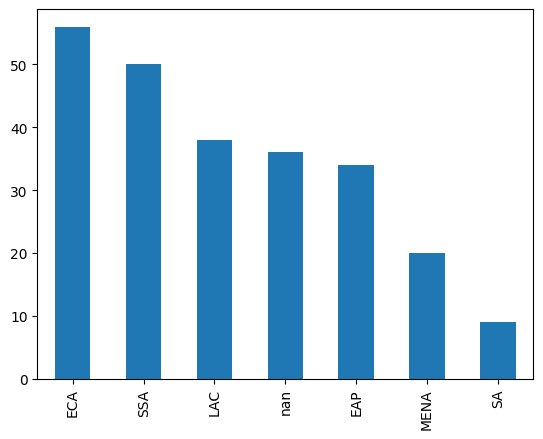

In [ ]:
merged1['Region'].value_counts(dropna=False).plot(kind='bar')
#This shows the breakdown of countries in the dataset by the region they are situated in, with most countries in europe and central asia (ECA), followed by thoes located in Sub-saharan Africa (SSA)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
merged1.rename(columns={'Male_married_by_18(%)': 'Male'}, inplace=True)

In [ ]:
merged1.rename(columns={'Male dropout rate': "Maledropout"}, inplace=True)

In [ ]:
Maledropout1=merged1['Maledropout']

In [ ]:
Male18=merged1['Male']

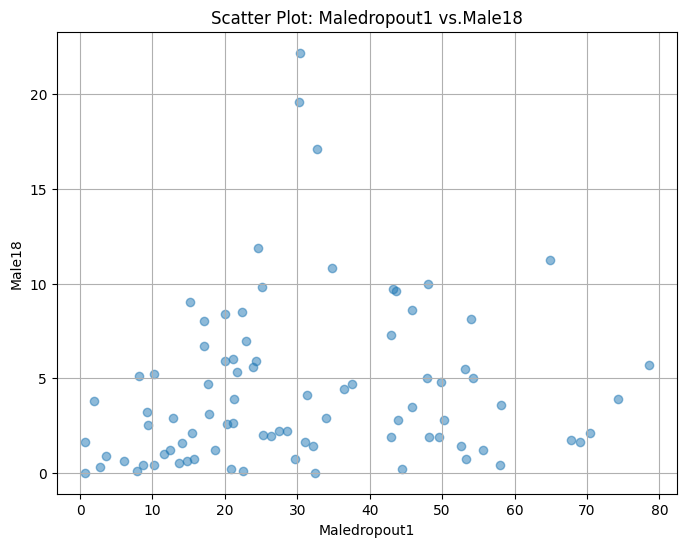

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Maledropout1, Male18, alpha=0.5)
plt.title('Scatter Plot: Maledropout1 vs.Male18')
plt.xlabel('Maledropout1')
plt.ylabel('Male18')
plt.grid(True)
plt.show()
#this shows that the increase in the dropout rate of male somewhat coincides with the increase in the rate of male married by 18, even though the postive correlation in between seems not very strong.